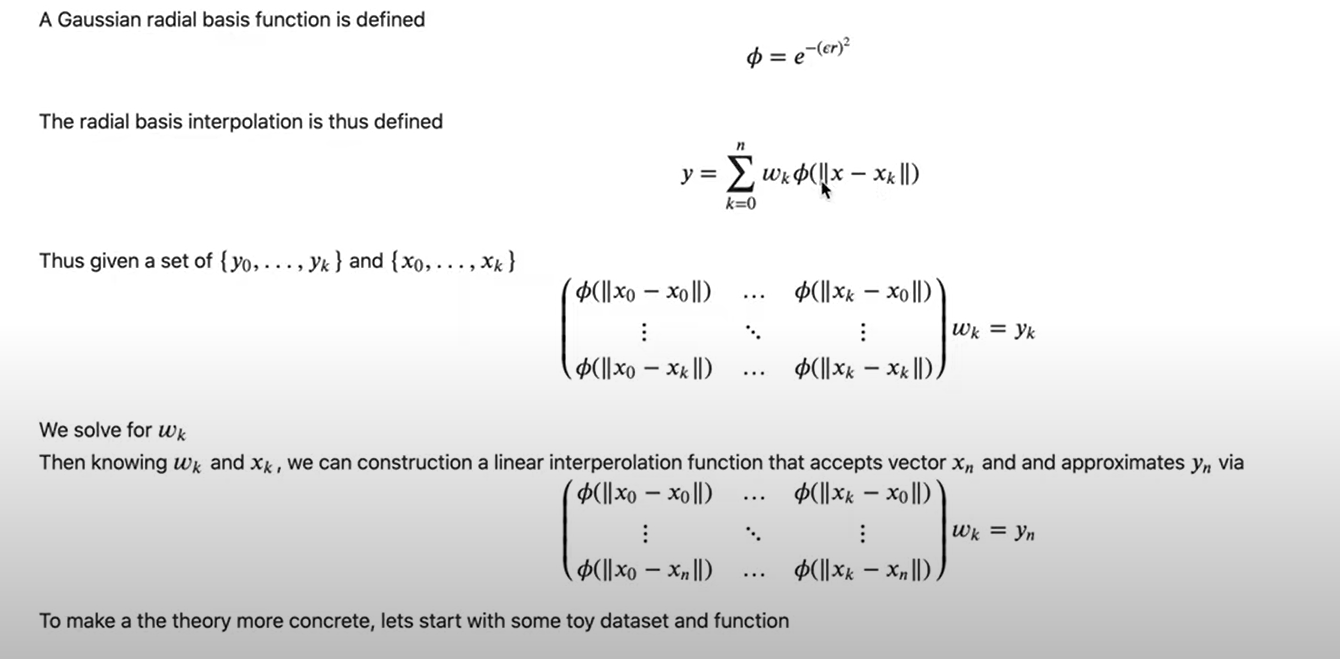

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cmath

In [2]:
track_data = pd.read_excel (r'D:\RBF\track_data.xlsx')
track_data = np.array(track_data)
x_data = track_data[:,1]
y_data = track_data[:,2]
s_data = track_data[:,0]
lap_data = track_data[:,4]

In [3]:
max_index = np.size(x_data)

In [4]:
END_index = 300
power = 5
eps = 1/50

In [5]:
xk = x_data[:END_index]
yk = y_data[:END_index]
sk = s_data[:END_index]
lapk = lap_data[:END_index]

In [6]:
def mat_p(array_, prec):
  print(np.array_str(array_, precision=prec, suppress_small=True))

In [7]:
mod_k = np.zeros((17,17))

for i in range(17):
    for j in range(17):
        if i==j:
            mod_k[i,j]=1
        elif abs(i-j)==1:
            mod_k[i,j]=0.6065
        elif abs(i-j)==2:
             mod_k[i,j]=0.1353
        elif abs(i-j)==3:
            mod_k[i,j]=0.0111

df = pd.DataFrame(mod_k).T
df.to_excel(excel_writer = "D:\mod_gbf.xlsx")

In [8]:
##normalised between 0 to 360 counter clockwise

def yawing(x,y):
  yaw = []
  for i,_ in enumerate(x):
    angle = np.rad2deg( (np.arctan2(np.abs(y[i]),np.abs(x[i]))))
    # print(i)
    fact = 1
    if y[i]>=0 and x[i]<0:
      val = 0
      yaw.append((val + angle)/fact)
    elif y[i]>=0 and x[i]>=0:
      val = 180
      yaw.append((val-angle)/fact)
    elif y[i]<0 and x[i]>0:
      val = 180
      yaw.append((val+angle)/fact)
    else:
      val = 360
      yaw.append((val - angle)/fact)
  return yaw


  

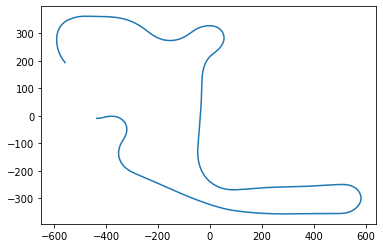

In [9]:
x = (x_data[:END_index])*1.01
y = (y_data[:END_index])*0.99999999
lap = lap_data[:END_index]

yaw_k = yawing(xk,yk)
yaw = yawing(x,y)
plt.plot(xk,yk)

In [10]:
thet_f = pd.DataFrame(yaw_k).T
thet_f.to_excel(excel_writer = "D:\ yaw_k.xlsx")
yaw_k

[19.193860397384398,
 19.80038186226953,
 20.475671618078255,
 21.211594926643315,
 21.97680020340708,
 22.75656590423567,
 23.538236554667666,
 24.321983114978927,
 25.098822729762375,
 25.866126366430027,
 26.63206490829053,
 27.393837774065986,
 28.14557633400047,
 28.882648033577514,
 29.597905798224776,
 30.28514976107544,
 30.94805806401504,
 31.58677211280506,
 32.197474526772076,
 32.775628581780374,
 33.33431518002009,
 33.901997901703616,
 34.48235609303434,
 35.06603685400717,
 35.64943181698242,
 36.225005532356505,
 36.79310924187992,
 37.36541929119562,
 37.9641616175045,
 38.59671142207113,
 39.26325686361412,
 39.96607312455771,
 40.70346673995596,
 41.468824444991235,
 42.26753569466948,
 43.09199172136705,
 43.93654365562079,
 44.79299819933418,
 45.64375375952628,
 46.488353803615205,
 47.32258571482528,
 48.133033232574874,
 48.90679036767034,
 49.630361629183085,
 50.30005480639374,
 50.91976613953255,
 51.491397670479415,
 52.03545111820815,
 52.60829196254827,
 5

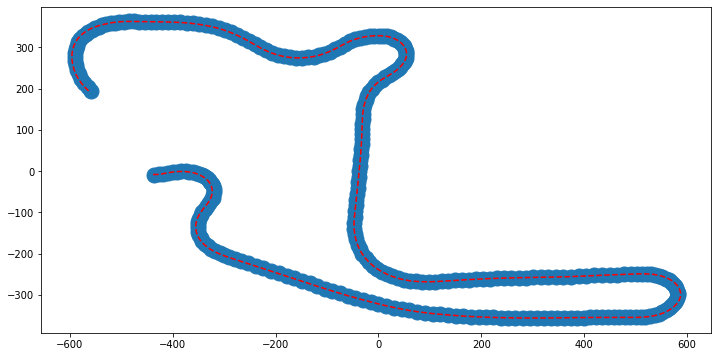

In [11]:
plt.figure(figsize=(12,6))
plt.plot(xk, yk, 'o', markersize=15)
plt.plot(x, y, '--r')

In [12]:
def eucl_dist_1d_sqr(x, xk):
  return (x.reshape(-1,1) - xk.reshape(1,-1))**2

In [13]:
def lap_comp(lap, lapk):
    comp = np.divide(lap.reshape(-1,1),lapk.reshape(1,-1))
    comp[comp!=1] = 0
    return comp

In [14]:
def dist_1d(x, xk):
  
  
  return np.abs((x.reshape(-1,1) - xk.reshape(1,-1)))

In [15]:


thet_k = (dist_1d(np.array(np.deg2rad(yaw_k)), np.array(np.deg2rad(yaw_k))))
thet_k[thet_k>np.pi/2] = np.pi/2 
thet_n = (dist_1d(np.array(np.deg2rad(yaw)), np.array(np.deg2rad(yaw_k))))
thet_n[thet_n>np.pi/2] = np.pi/2 

gamma_k= ( np.cos(thet_k))
gamma_n = ( np.cos(thet_n))

In [16]:
thet_f = pd.DataFrame(thet_k).T
thet_f.to_excel(excel_writer = "D:\ thet_k.xlsx")
# print(thet_k)
thet_fn = pd.DataFrame(thet_n).T
thet_fn.to_excel(excel_writer = "D:\ thet_n.xlsx")

In [17]:
mat_p(thet_n,3)

[[0.003 0.014 0.025 ... 1.571 1.571 1.571]
 [0.007 0.003 0.015 ... 1.571 1.571 1.571]
 [0.019 0.009 0.003 ... 1.571 1.571 1.571]
 ...
 [1.571 1.571 1.571 ... 0.    0.003 0.003]
 [1.571 1.571 1.571 ... 0.002 0.    0.   ]
 [1.571 1.571 1.571 ... 0.002 0.    0.   ]]


In [18]:

df = pd.DataFrame(gamma_n**power).T
df.to_excel(excel_writer = "D:\gamma_n.xlsx")

In [19]:
def mat_p(array_, prec):
  print(np.array_str(array_, precision=prec, suppress_small=True))

In [20]:
def eucl_dist_2d(x, xk, y, yk):
  
  return np.sqrt(eucl_dist_1d_sqr(x, xk) + (eucl_dist_1d_sqr(y, yk)))

In [21]:
def gauss_rbf(radius,gamma, eps, lap, lapk):
  temp0 = (pow(gamma,power)*np.exp(-(eps*radius)**2))
  temp = np.multiply(temp0, lap_comp(lap,lapk))
  temp0[temp0<pow(10,-5)] = 0
  return temp0

In [22]:
df = pd.DataFrame(gauss_rbf(eucl_dist_2d(xk, xk, yk, yk),gamma_k, eps, lapk, lapk)).T
df.to_excel(excel_writer = "D:\gauss_k.xlsx")

In [23]:

df = pd.DataFrame(gauss_rbf(eucl_dist_2d(np.array(x), xk, np.array(y), yk),gamma_n, eps, lap, lapk)).T
df.to_excel(excel_writer = "D:\gauss_n.xlsx")

In [24]:

class RBF(object):
  def __init__(self, gamma, eps, lap, lapk) -> None:
      self.gamma_ = gamma
      self.eps = eps
      self.lap = lap
      self.lapk = lapk

  def fit(self, xk, yk, zk) -> None:
      self.xk_ = xk
      self.yk_ = yk
      trnsf = gauss_rbf(eucl_dist_2d(xk, xk, yk, yk), self.gamma_, self.eps, self.lapk, self.lapk)
      self.w_ = np.linalg.solve(trnsf, zk)

  def __call__(self, xn, yn, gamma_n):
      trnsf = gauss_rbf(eucl_dist_2d(np.array(xn), self.xk_, np.array(yn), self.yk_), gamma_n, self.eps, self.lap, self.lapk)
      return trnsf.dot(self.w_)

In [25]:
ob = RBF(gamma_k, eps, lap, lapk)

In [26]:
ob.fit(xk, yk, sk)
ob.w_

array([-1.82565003e+02,  2.06580488e+02,  1.12109649e+03, -4.76356297e+03,
        9.28141631e+03, -9.06746376e+03, -1.34181928e+03,  1.75070464e+04,
       -2.24154034e+04,  5.36358468e+03,  1.87074025e+04, -2.36197692e+04,
        7.53596360e+03,  5.42401743e+03, -1.26293940e+03, -6.58756838e+03,
        5.20316891e+03,  1.67916474e+01, -3.02865315e+03,  6.02890375e+03,
       -6.87491369e+03,  5.28417571e+03, -9.53778284e+03,  2.10386907e+04,
       -2.78084415e+04,  2.23350206e+04, -1.01049301e+04,  1.45669151e+03,
        2.92859129e+01,  2.21382104e+03, -2.91850173e+03,  1.48914268e+03,
       -1.59824359e+01,  3.98024199e+01, -5.69947028e+00, -4.94549483e+02,
        7.57042207e+02,  3.80524474e+02, -1.38801080e+03,  1.38226758e+03,
       -1.77894288e+02, -1.03143793e+03,  3.56156474e+03, -8.29603006e+03,
        1.46916541e+04, -1.79374010e+04,  1.47625860e+04, -5.27723857e+03,
       -4.53733702e+03,  9.09159336e+03, -5.81376007e+03, -2.65715315e+02,
        4.12945891e+03, -

In [27]:
s = ob(x,y, gamma_n)
s
sf = pd.DataFrame(s).T
sf.to_excel(excel_writer = "D:\s_final.xlsx")

In [28]:
true_s = sk

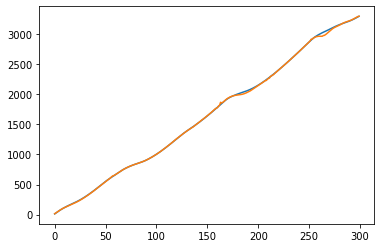

In [29]:
plt.plot(range(np.size(sk[:END_index])), sk[:END_index])
plt.plot(range(np.size(s)), s)   

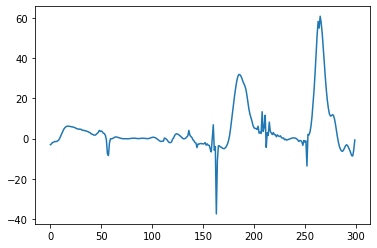

In [30]:
plt.plot(range(np.size(s)), true_s-s)
